In [1]:
#importing useful python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix#,confusion_matrix_at_thresholds
#from sklearn.metrics import confusion_matrix_at_thresholds

In [2]:
#loading dataset
df = pd.read_parquet("subset of baseline with samples 50neg & pos.parquet")

In [3]:
#checking if loaded properly:column check
df.keys()


Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew', 'stetson_K',
       'cluster', 'cluster_id'],
      dtype='object')

In [4]:
#elements check
df.head(20)

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster,cluster_id
0,ZTF18aayuzaj,13.688346,13.685163,0.358838,13.631022,1.704284,0.301001,0.170863,0.969517,0.810235,...,0.210744,0.437644,2.291209,0.026215,20.932565,520.519968,0.432772,0.768013,1.0,1
1,ZTF18abhbhwd,17.320197,17.243750,0.278426,17.266830,1.103769,0.292739,0.219918,0.787825,0.196193,...,0.147615,0.319247,1.451160,0.016075,93.740888,130.468214,0.865308,0.804507,1.0,1
2,ZTF18aaxcyth,15.436886,15.433020,0.130212,15.435888,0.826002,0.329772,0.122198,0.333758,3.247273,...,0.088842,0.473102,1.279842,0.008435,1.824835,63.276991,0.411712,0.786535,1.0,1
3,ZTF18aazdcyl,15.689254,15.684933,0.135519,15.741753,0.621263,0.240160,0.271068,0.361851,0.922049,...,0.051640,0.533942,0.680359,0.008638,75.146382,69.269782,-0.887205,0.778961,1.0,1
4,ZTF18abebizu,15.751828,15.722266,0.347854,15.844798,1.027375,0.532240,0.405152,0.858655,-1.434871,...,0.288947,0.160656,1.338771,0.022083,97.552446,475.655417,-0.197862,0.916768,1.0,1
5,ZTF18abeboej,16.873177,16.853040,0.218995,16.830446,0.604088,0.241023,0.239213,0.563981,1.042065,...,0.070240,0.455930,0.687952,0.012979,85.955018,94.008855,0.827206,0.686488,1.0,1
6,ZTF18ablngjt,15.562575,15.556951,0.229989,15.593740,0.496760,0.249720,0.289331,0.619872,-0.682549,...,0.165377,0.180291,0.579692,0.014778,74.573044,192.966851,-0.700740,0.834077,1.0,1
7,ZTF18aawkwln,15.635200,15.635153,0.055664,15.633553,0.410186,0.296514,0.246065,0.134338,4.446734,...,0.037347,0.536417,0.445989,0.003560,7.117692,13.929589,0.139707,0.772886,1.0,1
8,J0614-2725,18.765020,18.543927,0.398182,18.761408,1.631694,0.279602,0.119857,0.935667,2.276925,...,0.242128,0.353234,2.082767,0.021219,2.637823,31.199294,0.604146,0.809469,NaN,None
9,ZTF18adkcxpf,14.631970,14.629926,0.133584,14.630080,0.741823,0.257652,0.140158,0.311347,5.767534,...,0.067157,0.520868,1.136209,0.009130,30.313342,109.092012,1.047373,0.683152,1.0,1


In [5]:
#stepping forward with useful numerical data only
X = df.drop(columns=['object','cluster', 'cluster_id']).values

In [6]:
# object column contains names like 'ZTF18abc...' or non-ZTF names : Binary conversion of objects
y = np.where(df['object'].str.contains('ZTF', case=False),
             -1,   # ZTF → negative
              1)   # non-ZTF → positive

In [7]:
#runthrough
X

array([[ 1.36883456e+01,  1.36851629e+01,  3.58837566e-01, ...,
         5.20519968e+02,  4.32772256e-01,  7.68013461e-01],
       [ 1.73201972e+01,  1.72437497e+01,  2.78425993e-01, ...,
         1.30468214e+02,  8.65308001e-01,  8.04507225e-01],
       [ 1.54368865e+01,  1.54330198e+01,  1.30212161e-01, ...,
         6.32769913e+01,  4.11711919e-01,  7.86535165e-01],
       ...,
       [ 1.80104926e+01,  1.72123293e+01,  1.23640135e+00, ...,
         4.53392793e+02,  8.65250910e-01,  8.86083625e-01],
       [ 1.70137729e+01,  1.69835731e+01,  2.21157098e-01, ...,
         9.81349013e+01,  1.31091092e+00,  6.70645606e-01],
       [ 1.63111787e+01,  1.63002903e+01,  1.86079931e-01, ...,
         1.17600481e+02, -7.29353574e-01,  8.29970429e-01]])

In [8]:
#runthrough
y

array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1

In [9]:
#now we'll run a step by step code to implement most accurate number os trees in my random(n_estimator value) and test train split(test_size)
test_sizes = np.arange(0.5, 0.91, 0.01)          # 50% to 90% test_size
n_estimators_list = range(10, 151, 10)         # 10 to 150 trees


In [10]:
#introducing a black array to store my results
results = []

In [11]:
#running loop to find most accurate data

In [12]:
for ts in test_sizes:
    # Fix split for this test size
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=ts,
        #stratify=y, #commenting as python library has inbulit
        #random_state=42 #commenting for working with diff random elements with each run
    )

    for n in n_estimators_list:
        clf = RandomForestClassifier(
            n_estimators=n,
            #class_weight="balanced",#balanced elements from each class
        )

        # Cross-Validation ONLY on training data
        scores = cross_val_score(
            clf,
            X_train,
            y_train,
            cv=5,
        )
#results
        results.append({
            "test_size": ts,
            "n_estimators": n,
            "cv_mean": scores.mean(),
            "cv_std": scores.std()
        })

        print(f"test_size={ts:.2f} | n={n:3d} | CV={scores.mean():.3f} ± {scores.std():.3f}")


test_size=0.50 | n= 10 | CV=0.932 ± 0.019
test_size=0.50 | n= 20 | CV=0.945 ± 0.013
test_size=0.50 | n= 30 | CV=0.945 ± 0.013
test_size=0.50 | n= 40 | CV=0.948 ± 0.012
test_size=0.50 | n= 50 | CV=0.943 ± 0.029
test_size=0.50 | n= 60 | CV=0.945 ± 0.019
test_size=0.50 | n= 70 | CV=0.950 ± 0.019
test_size=0.50 | n= 80 | CV=0.940 ± 0.022
test_size=0.50 | n= 90 | CV=0.953 ± 0.009
test_size=0.50 | n=100 | CV=0.940 ± 0.015
test_size=0.50 | n=110 | CV=0.948 ± 0.012
test_size=0.50 | n=120 | CV=0.950 ± 0.016
test_size=0.50 | n=130 | CV=0.945 ± 0.013
test_size=0.50 | n=140 | CV=0.948 ± 0.012
test_size=0.50 | n=150 | CV=0.940 ± 0.022
test_size=0.51 | n= 10 | CV=0.952 ± 0.017
test_size=0.51 | n= 20 | CV=0.944 ± 0.028
test_size=0.51 | n= 30 | CV=0.964 ± 0.020
test_size=0.51 | n= 40 | CV=0.949 ± 0.039
test_size=0.51 | n= 50 | CV=0.954 ± 0.037
test_size=0.51 | n= 60 | CV=0.952 ± 0.038
test_size=0.51 | n= 70 | CV=0.957 ± 0.026
test_size=0.51 | n= 80 | CV=0.962 ± 0.025
test_size=0.51 | n= 90 | CV=0.954 

In [13]:
#saving result data frame
results_df = pd.DataFrame(results)


In [14]:
#show it
results_df

,test_size,n_estimators,cv_mean,cv_std
0,0.5,10,0.932500,0.018708
1,0.5,20,0.945000,0.012748
2,0.5,30,0.945000,0.012748
3,0.5,40,0.947500,0.012247
4,0.5,50,0.942500,0.029155
...,...,...,...,...
610,0.9,110,0.923333,0.048634
611,0.9,120,0.948333,0.063333
612,0.9,130,0.935833,0.057831
613,0.9,140,0.949167,0.047022


In [15]:
#most accurate
best_row = results_df.loc[results_df["cv_mean"].idxmax()]

best_test_size = best_row["test_size"]
best_n = best_row["n_estimators"]

print("\nBEST CONFIGURATION")
print(best_row)



BEST CONFIGURATION
test_size        0.890000
n_estimators    40.000000
cv_mean          0.977124
cv_std           0.028036
Name: 588, dtype: float64


In [16]:
#run accuracy
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=best_test_size,
)

final_model = RandomForestClassifier(
    n_estimators=int(best_n),
    #class_weight="balanced",
   
)

final_model.fit(X_train, y_train)

test_accuracy = final_model.score(X_test, y_test)
print("\nFinal test accuracy:", test_accuracy)



Final test accuracy: 0.9284712482468443


In [17]:
#dataset split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=best_test_size,
   
)

In [18]:
# Save training set
df_train = pd.DataFrame(X_train)
df_train['y'] = y_train
df_train.to_csv("training_set.csv", index=False)

# Save test set
df_test = pd.DataFrame(X_test)
df_test['y'] = y_test
df_test.to_csv("test_set.csv", index=False)

In [19]:
#test_set
df_test=pd.read_csv("test_set.csv")

In [20]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,y
0,18.698472,18.666318,0.148085,18.703554,0.457648,0.323529,0.235844,0.393805,-0.192066,-0.000016,...,187.900246,0.099949,0.237395,0.486221,0.007920,0.486493,11.527544,-0.182791,0.806461,1
1,17.852861,17.793440,0.233164,17.800728,0.825891,0.355044,0.226409,0.556244,-0.218628,-0.000106,...,468.201501,0.180683,0.220885,0.836372,0.013060,49.317617,48.961930,0.559578,0.855463,-1
2,18.765020,18.543927,0.398182,18.761408,1.631694,0.279602,0.119857,0.935667,2.276925,0.000188,...,4276.191439,0.242128,0.353234,2.082767,0.021219,2.637823,31.199294,0.604146,0.809469,1
3,16.464078,16.462916,0.052300,16.468399,0.402639,0.294908,0.329260,0.119305,5.688238,0.000044,...,514.882811,0.039288,0.521544,0.470627,0.003177,16.883749,10.646142,-0.265321,0.813742,-1
4,15.643574,15.637814,0.146426,15.616229,0.560123,0.302172,0.264852,0.345054,0.115611,-0.000019,...,520.776866,0.091209,0.201448,0.665774,0.009360,20.167619,94.868568,0.294182,0.831290,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,16.873177,16.853040,0.218995,16.830446,0.604088,0.241023,0.239213,0.563981,1.042065,-0.000047,...,212.372948,0.070240,0.455930,0.687952,0.012979,85.955018,94.008855,0.827206,0.686488,-1
709,16.509762,16.505613,0.104388,16.511135,0.578523,0.395670,0.348550,0.255138,0.192322,0.000082,...,575.877831,0.095016,0.260974,0.629042,0.006323,37.069702,26.327334,-0.349158,0.865469,-1
710,14.924512,14.924749,0.200767,15.016751,0.687087,0.380656,0.342729,0.514084,-0.890614,0.000038,...,599.968458,0.121478,0.363122,0.730005,0.013452,65.202857,95.454066,-0.333531,0.881971,-1
711,13.460107,13.459891,0.168845,13.443667,0.864927,0.341234,0.133597,0.425200,3.638693,-0.000065,...,509.637133,0.105954,0.381866,1.340620,0.012544,17.672370,149.715668,0.907101,0.784166,-1


In [21]:
#trainingset
df_train=pd.read_csv("training_set.csv")

In [22]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,y
0,15.954566,15.949912,0.133589,15.904966,1.189068,0.187457,0.232452,0.267652,16.219306,-0.000069,...,525.372274,0.060776,0.698023,1.658087,0.008373,43.704291,52.964607,2.015123,0.777978,-1
1,16.647196,16.621867,0.228340,16.648296,0.610829,0.437851,0.210420,0.595527,-0.661551,-0.000165,...,457.257371,0.198778,0.211397,0.722767,0.013716,37.835075,124.217914,0.368301,0.847001,-1
2,16.192457,15.881323,0.860832,16.276931,2.355515,0.329545,0.171257,2.214759,-0.316707,-0.000285,...,2859.880577,0.581201,0.201446,2.793494,0.053163,2.534926,3645.474556,-0.301323,0.833756,1
3,16.348419,16.338421,0.156719,16.314339,0.661419,0.284921,0.103207,0.453221,0.346694,0.000006,...,513.440825,0.094666,0.308973,0.983370,0.009586,93.530425,70.798059,0.957047,0.801836,-1
4,15.635200,15.635153,0.055664,15.633553,0.410186,0.296514,0.246065,0.134338,4.446734,0.000039,...,419.458968,0.037347,0.536417,0.445989,0.003560,7.117692,13.929589,0.139707,0.772886,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,17.747432,17.735122,0.102866,17.754228,1.209559,0.167857,0.125264,0.188236,156.988180,-0.000012,...,209.542109,0.048647,0.883929,2.112926,0.005796,27.137568,33.199411,-8.001418,0.452335,1
83,16.871537,16.850805,0.185264,16.887091,0.567945,0.438838,0.230920,0.475643,-0.755014,-0.000114,...,340.184655,0.149630,0.227523,0.700201,0.010981,47.810461,79.532344,0.152904,0.860447,-1
84,17.376415,17.372990,0.070929,17.379942,0.753330,0.312395,0.283926,0.173088,21.713889,0.000053,...,625.267742,0.039303,0.725743,0.949339,0.004082,12.813371,8.513217,-1.709910,0.692751,-1
85,16.654061,16.651763,0.078853,16.664974,0.399733,0.314956,0.364285,0.193176,0.520959,0.000062,...,335.216219,0.059408,0.280022,0.533226,0.004735,31.846293,15.583201,-0.274010,0.841964,-1


In [23]:
#Train the Random Forest classifier
clf = RandomForestClassifier(
    n_estimators=int(best_n),      # number of trees in my forest
    #random_state=None,     # different forest each run
)

clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=40)

In [24]:
# check the results or efficiency of the forest

accuracy = clf.score(X_test, y_test)
print("Test accuracy:", accuracy)


Test accuracy: 0.9453015427769986


In [25]:
#measuring robustness through 5-fold cross-validation.
scores = cross_val_score(
    clf,
    X,
    y,
    cv=5
)

print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())
print("Std CV accuracy:", scores.std())


Cross-validation scores: [0.9625  0.95    0.96875 0.96875 0.96875]
Mean CV accuracy: 0.9637499999999999
Std CV accuracy: 0.007288689868556642


In [26]:
# Check class probabilities for the test set.
# predict_proba returns an array of shape (N_test, 2),
# where N_test is the number of test objects.
# Column 0 → probability of class -1 (negative, ZTF)
# Column 1 → probability of class +1 (positive, non-ZTF)
probs = clf.predict_proba(X_test)
print('probs',probs)

probs [[0.4   0.6  ]
 [0.85  0.15 ]
 [0.075 0.925]
 ...
 [1.    0.   ]
 [0.95  0.05 ]
 [1.    0.   ]]


Confusion matrix (raw counts):
[[617  12]
 [ 27  57]]


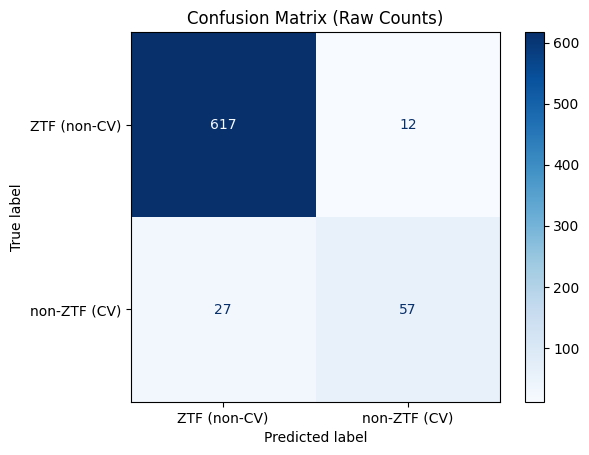


===== CONFUSION MATRIX ELEMENTS =====
True Negatives  (ZTF correctly classified): 617
False Positives (ZTF misclassified as non-ZTF): 12
False Negatives (non-ZTF misclassified as ZTF): 27
True Positives  (non-ZTF correctly classified): 57


In [27]:
# CONFUSION MATRIX + TP / TN / FP / FN IDENTIFICATION
# Class labels for clarity
class_names = ["ZTF (non-CV)", "non-ZTF (CV)"]

# Plot confusion matrix (raw counts)
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues #heatmap
)

disp.ax_.set_title("Confusion Matrix (Raw Counts)")
print("Confusion matrix (raw counts):")
print(disp.confusion_matrix)

plt.show()


# Extract TN, FP, FN, TP explicitly
# Label convention used in YOUR code:
#   -1 → ZTF (negative, non-CV)
#   +1 → non-ZTF (positive, CV)

cm = confusion_matrix(y_test, clf.predict(X_test), labels=[-1, 1])

TN, FP, FN, TP = cm.ravel()

print("\n===== CONFUSION MATRIX ELEMENTS =====")
print(f"True Negatives  (ZTF correctly classified): {TN}")
print(f"False Positives (ZTF misclassified as non-ZTF): {FP}")
print(f"False Negatives (non-ZTF misclassified as ZTF): {FN}")
print(f"True Positives  (non-ZTF correctly classified): {TP}")
